<a href="https://colab.research.google.com/github/KasulaPavanKumar-Cloud/MachineLearning-Projects/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kaggle.json not found. Please upload it using files.upload() and uncomment that line.
Skipping Kaggle download as kaggle.json was not found.
Initial shape: (9994, 13)
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


/tmp/ipython-input-2291699338.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
/tmp/ipython-input-2291699338.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

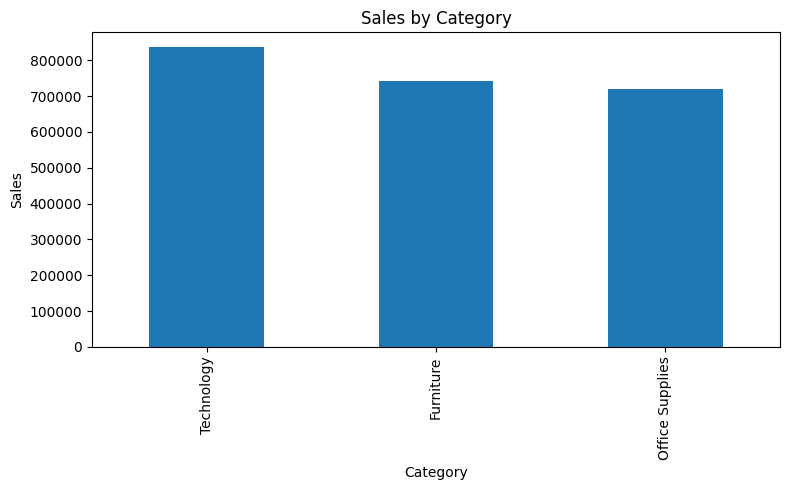

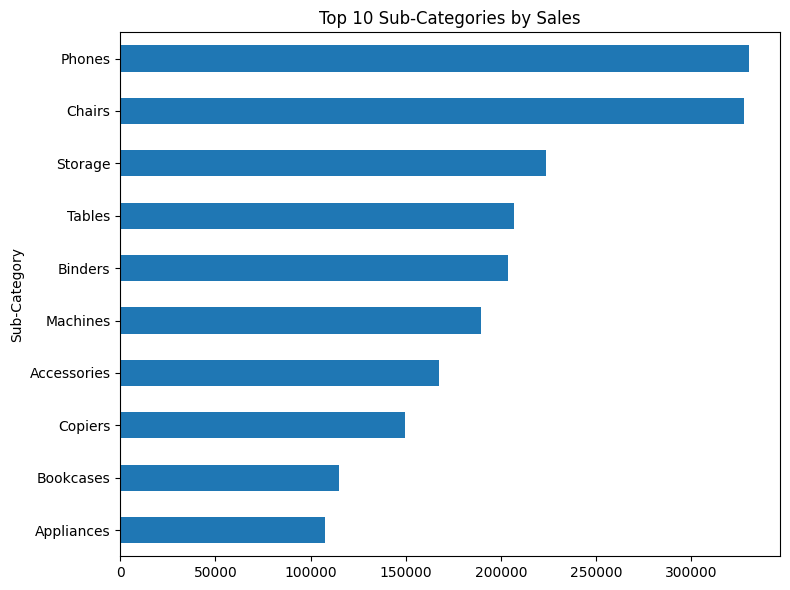

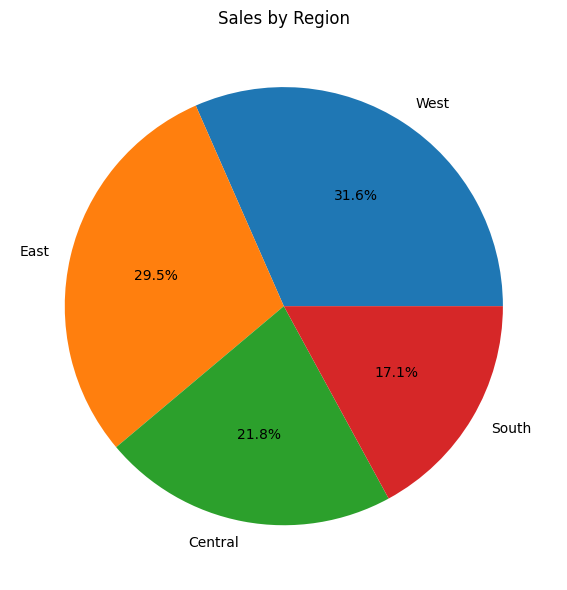

Report saved as Superstore_Sales_Analysis_Report.pptx


In [8]:
# ========== Setup & Imports ==========

!pip install pandas matplotlib plotly statsmodels python-pptx openpyxl kaggle --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pptx import Presentation
from pptx.util import Inches
import os

# ========== Download dataset from Kaggle ==========

# (In Colab) upload your kaggle.json first via files.upload()
from google.colab import files
# files.upload()   # uncomment and run this to upload kaggle.json

!mkdir -p ~/.kaggle
# Check if kaggle.json exists before moving and changing permissions
if os.path.exists('kaggle.json'):
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
else:
    print("kaggle.json not found. Please upload it using files.upload() and uncomment that line.")


# Download the dataset
# Only attempt download if kaggle.json was found
if os.path.exists('~/.kaggle/kaggle.json'):
    !kaggle datasets download -d bravehart101/sample-supermarket-dataset -q
    !unzip -o sample-supermarket-dataset.zip -d data
else:
    print("Skipping Kaggle download as kaggle.json was not found.")


# ========== Load & Inspect ==========
# Adjust the CSV name (check what file is inside `data/`)
df = pd.read_csv("/content/SampleSuperstore.csv", low_memory=False)
print("Initial shape:", df.shape)
print(df.columns)
df.head()

# ========== Cleaning ==========

# Drop duplicates
df = df.drop_duplicates()

# Convert numeric fields (Sales, Profit, Quantity) if needed
for col in ['Sales', 'Profit', 'Quantity']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing: numeric → median; categorical → “Unknown”
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)
for c in cat_cols:
    df[c].fillna('Unknown', inplace=True)

# ========== Feature Engineering (Requires 'Order Date' column) ==========
# The 'Order Date' column was not found in the dataset, so the following
# feature engineering and time series analysis steps are commented out.
# If you have a dataset with an 'Order Date' column, replace the CSV and
# uncomment the code below.

# df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=False, errors='coerce') # Convert 'Order Date' to datetime after loading
# df['year'] = df['Order Date'].dt.year
# df['month'] = df['Order Date'].dt.month
# df['month_year'] = df['Order Date'].dt.to_period('M')
# df['month_year_ts'] = df['month_year'].dt.to_timestamp()

# ========== Time Series: Monthly Sales (Requires 'Order Date' column) ==========

# monthly = df.groupby('month_year_ts')['Sales'].sum().sort_index()

# plt.figure(figsize=(12,5))
# plt.plot(monthly.index, monthly.values, label='Monthly Sales')
# plt.plot(monthly.index, monthly.rolling(3).mean(), label='3-month MA')
# plt.plot(monthly.index, monthly.rolling(12).mean(), label='12-month MA')
# plt.title("Monthly Sales with Rolling Averages")
# plt.xlabel("Date")
# plt.ylabel("Sales")
# plt.legend()
# plt.tight_layout()
# plt.savefig('monthly_sales.png')
# plt.show()

# Seasonal decomposition (assuming additive)
# res = seasonal_decompose(monthly, model='additive', period=12, extrapolate_trend='freq')
# res.plot()
# plt.tight_layout()
# plt.savefig('seasonal_decompose.png')
# plt.show()

# ========== Segment Analysis ==========

# Sales by Category
if 'Category' in df.columns:
    cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    cat_sales.plot(kind='bar')
    plt.title("Sales by Category")
    plt.ylabel("Sales")
    plt.tight_layout()
    plt.savefig('sales_by_category.png')
    plt.show()

# Top 10 sub-categories (if exists)
if 'Sub-Category' in df.columns:
    sub_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(8,6))
    sub_sales.plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title("Top 10 Sub-Categories by Sales")
    plt.tight_layout()
    plt.savefig('top_subcategories.png')
    plt.show()

# Sales by Region
if 'Region' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(6,6))
    region_sales.plot(kind='pie', autopct='%1.1f%%')
    plt.title("Sales by Region")
    plt.ylabel("")
    plt.tight_layout()
    plt.savefig('sales_by_region.png')
    plt.show()

# ========== Statistics & Growth ==========
# These calculations depend on the 'Order Date' column, so they are commented out.
total_sales = df['Sales'].sum()
# avg_month = monthly.mean()
print(f"Total sales: {total_sales:,.2f}")
# print(f"Average monthly sales: {avg_month:,.2f}")

# Month-over-month growth (percentage)
# monthly_pct = monthly.pct_change().dropna() * 100
# monthly_pct.head(5)

# ========== Create PowerPoint Report ==========

prs = Presentation()
# Title slide
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Sales Data Analysis – Sample Superstore"
slide.placeholders[1].text = "Your Name | Date"

# Slide: Monthly Sales Trend (Requires 'Order Date' column)
# slide2 = prs.slides.add_slide(prs.slide_layouts[5])
# slide2.shapes.title.text = "Monthly Sales Trend"
# slide2.shapes.add_picture('monthly_sales.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide: Seasonal Decomposition (Requires 'Order Date' column)
# slide3 = prs.slides.add_slide(prs.slide_layouts[5])
# slide3.shapes.title.text = "Seasonality & Trend Decomposition"
# slide3.shapes.add_picture('seasonal_decompose.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide: Sales by Category
slide4 = prs.slides.add_slide(prs.slide_layouts[5])
slide4.shapes.title.text = "Sales by Category"
slide4.shapes.add_picture('sales_by_category.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide: Top Sub-Categories
slide5 = prs.slides.add_slide(prs.slide_layouts[5])
slide5.shapes.title.text = "Top 10 Sub-Categories"
slide5.shapes.add_picture('top_subcategories.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide: Regional Performance
slide6 = prs.slides.add_slide(prs.slide_layouts[5])
slide6.shapes.title.text = "Sales by Region"
slide6.shapes.add_picture('sales_by_region.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide: Insights & Recommendations (you’ll fill this)
slide7 = prs.slides.add_slide(prs.slide_layouts[5])
slide7.shapes.title.text = "Insights & Recommendations"
tx = slide7.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(4)).text_frame
tf = tx
tf.text = "• Insight 1: …\n• Insight 2: …\n• Recommendation 1: …\n• Recommendation 2: …"

# Save PPT
prs.save('Superstore_Sales_Analysis_Report.pptx')
print("Report saved as Superstore_Sales_Analysis_Report.pptx")